<a href="https://colab.research.google.com/github/tuba89/Final_checkpoint/blob/main/Home_Loan_Final_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Description of the dataset:

- The Dataset of A housing finance company that provides “mortgage loans” for homes in Urban/ Semi Urban/ Rural area. 
- The company wants to automate the loan eligibility process based on customer information and identify which factors / customer segments are eligible for the loan.
- the taget is: identify customer segments, whether they are eligible for the loan amount in order to be able to specifically target these customers.

**Customer details provided when filling in the online request form:** 
- Loand_ID: unique id number
- Gender: Male/Female
- Married: yes/no
- Dependents: Number of dependents 
- Education: Applicant Education (Graduate / Under Graduate) 
- Self_Employed: Self employed (y/n)
- ApplicantIncome: Applicant income
- CoapplicantIncome: Coapplicant income 
- LoanAmount: Loan amount in thousands 
- Loan_Amount_Term: Term of loan in months 
- Credit_History: credit history meets guidelines (les antécédents de crédit y or no)	
- Property_Area: Urban/ Semi Urban/ Rural 
- Loan_Status: Loan approved (Y/N) Y = approved, N= rejected



In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Exploration & analyse

In [2]:
# Loading the Dataset
path = "/content/drive/MyDrive/loan.csv"
loan = pd.read_csv(path)

In [3]:
# printing the first 5 rows of the dataframe
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns
loan.shape

(614, 13)

* There's 614 samples and 13 fearures

In [5]:
# statistical measures
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# number of .imissing values in each column
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* There's lots of missing values such as :

Features         | Number of null values
-----------------|----------------------
Gender           |       13 
Married          |       03
Dependents       |       15 
Self_Employed    |       32
LoanAmount       |       22 
Loan_Amount_Term |       14
Credit_History   |       50


In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


* i'll fill the missing values in **married feature** with **No** wich mean not married because there dependents are missing i guess that they haven't dependents , no children no spouse ..

In [8]:
# Fill the missing values in Married feature:
loan['Married'] = loan['Married'].fillna("No")

In [9]:
loan['Married'].value_counts()

Yes    398
No     216
Name: Married, dtype: int64

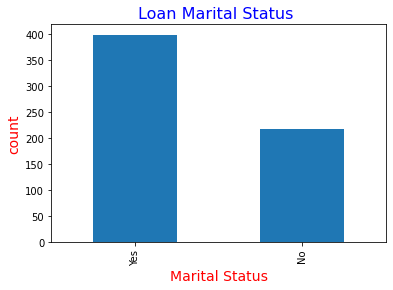

In [10]:
x = loan['Married']

x.value_counts().plot(kind='bar')
plt.xlabel('Marital Status', fontsize=14, c="r")
plt.ylabel('count', fontsize=14, c="r")
plt.title("Loan Marital Status ", fontsize=16, c="b")
plt.show()

* Most of the loans were approved to **married** compared to persons who are single or with no relationship.

In [11]:
loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

* i fill the missing values in **Dependents feature**, ((probabilité plus élevée d'avoir une personne à charge lorsqu'il sera marié))

In [12]:
loan['Dependents'].fillna(loan['Married'], inplace=True)

In [13]:
loan['Dependents'].value_counts()

0      345
1      102
2      101
3+      51
Yes      8
No       7
Name: Dependents, dtype: int64

In [14]:
# converting categorical values to numerical
loan['Dependents'] = loan['Dependents'].apply(lambda x : {'No' : 0, 
                                                          'Yes' : 1, 
                                                          '0' : 0, 
                                                          '1' : 1, 
                                                          '2' : 2, 
                                                          '3+' : 3}[x])

In [15]:
loan['Dependents'].value_counts()

0    352
1    110
2    101
3     51
Name: Dependents, dtype: int64

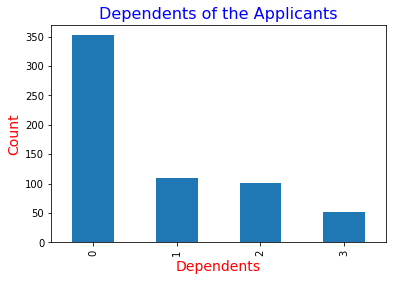

In [16]:
loan['Dependents'].value_counts().plot(kind='bar')
plt.xlabel('Dependents', fontsize=14, c="r")
plt.ylabel('Count', fontsize=14, c="r")
plt.title('Dependents of the Applicants', fontsize=16, c="b")
plt.show()

**Dependents** feature: From the analysis, There is a higher chance of getting home loan approval for applicants who have less number of dependents or no dependents. applicant with no charges.

In [17]:
loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [18]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [20]:
# Fill the missing values in gender feature by majority ("Male"):
loan['Gender'] = loan['Gender'].fillna('Male')

In [21]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
loan['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [23]:
loan['Gender'] = loan['Gender'].map({"Male":1, "Female":0})

In [24]:
loan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


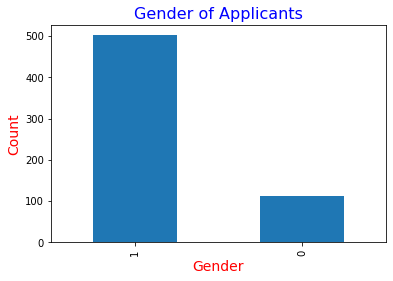

In [25]:

loan['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender', fontsize=14, c="r")
plt.ylabel('Count', fontsize=14, c="r")
plt.title('Gender of Applicants', fontsize=16, c="b")
plt.show()

Gender **Male** is more frequent then female. men are more home loan applicant than women.

In [26]:
loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [27]:
loan['Property_Area'].value_counts(normalize=True)*100

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

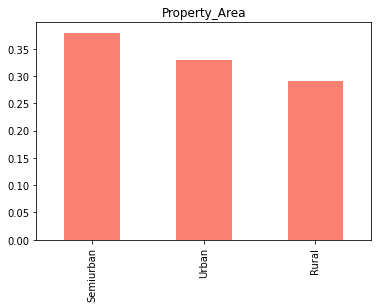

In [28]:
loan['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area',color="salmon")

$38$% people from **Semiurban** area

$33$% people from **Urban** area

$29$% people from **Rural** area.

There's no big difference.

In [29]:
loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [30]:
loan['Credit_History'].value_counts(normalize=True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

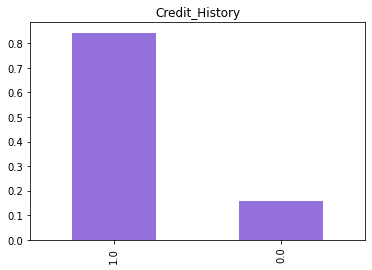

In [31]:
loan['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History',color="mediumpurple")

**Credit History** feature: Most of applicant have paid there debts, about 84% paid the debts and around 16% have not.

* There is missing values in cresit history, i guess that there's no records, perhaps thet have not demand a loan before or something else, 
    - 1st: i don't want to loose data by just dropping the rows of missingness
    - 2nd i can fill the **NaN** by 0 wich mean no records, but in this case 0 mean they didn't pay their debts.
    - wich mean,i go for the most frequent number, as this is 84% of the applicant paid their debts, so most likely to be true

In [32]:
# fill the credit history by "1" the most frequent value and this mean they paid their depts
loan['Credit_History'] = loan['Credit_History'].fillna(1)

In [33]:
loan["Education"].value_counts(normalize=True)*100

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

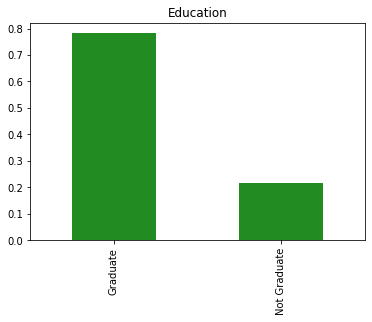

In [34]:
loan["Education"].value_counts(normalize=True).plot.bar(title = "Education", color='forestgreen')

**$78$** **%** are **Graduated** and about **$22$%** are **not Graduated**

In [35]:
loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

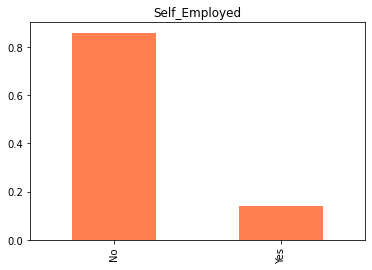

In [36]:

loan['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed', color='coral')

In [37]:
loan['Self_Employed'].value_counts(normalize=True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

* the majority of applicants are employees about $86$% of the applicant

In [38]:
loan['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

* The majority of the loans taken are for **360 Months** wich mean $30$ years. 

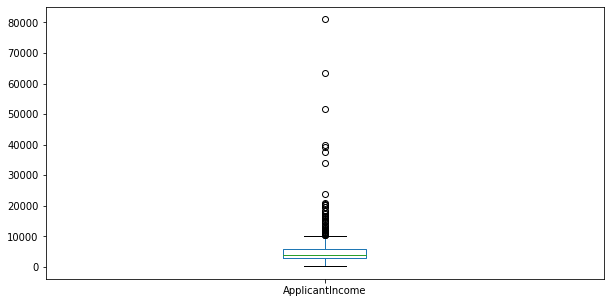

In [39]:
loan['ApplicantIncome'].plot.box(figsize=(10,5))

In [40]:
loan['ApplicantIncome'].value_counts()

2500    9
4583    6
2600    6
6000    6
5000    5
       ..
5818    1
5819    1
5821    1
2750    1
3691    1
Name: ApplicantIncome, Length: 505, dtype: int64

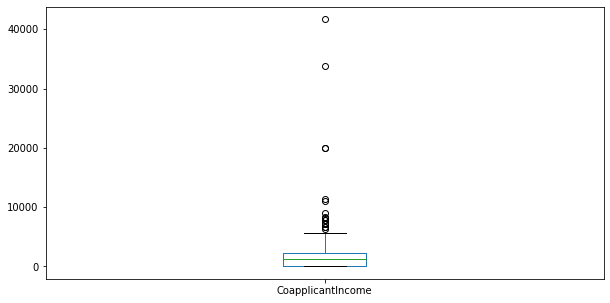

In [41]:
loan['CoapplicantIncome'].plot.box(figsize=(10,5))

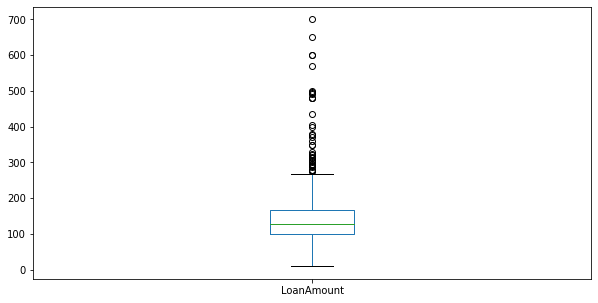

In [42]:
loan['LoanAmount'].plot.box(figsize=(10,5))

In [43]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(3), object(6)
memory usage: 62.5+ KB


In [44]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
# fill the NaN values in self-emplyed feature
# salary less then 5000 is an employee (no), else (>5000) is self-emplyed (yes)
missing_val = loan['Self_Employed'].isna()
mapping_dict = dict({'0-5000': 'No'})
loan.loc[missing_val, 'Self_Employed'] = loan.loc[missing_val, 'ApplicantIncome'].map(mapping_dict)
loan.loc[missing_val, 'Self_Employed'] = loan.loc[missing_val, 'Self_Employed'].fillna('Yes')


In [46]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
# fill missing values in Term feature by 360 (frequent value)
loan['Loan_Amount_Term'].fillna(360, inplace=True)

In [48]:
loan.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
# correct some values in loan amount term to avoid bad accuracy
# for example replacing 12 by 120 , 36 by 360 ... etc
loan['Loan_Amount_Term'] = np.where((loan.Loan_Amount_Term == 12 ), 120, loan.Loan_Amount_Term)
loan['Loan_Amount_Term'] = np.where((loan.Loan_Amount_Term == 36 ), 360, loan.Loan_Amount_Term)
loan['Loan_Amount_Term'] = np.where((loan.Loan_Amount_Term == 60 ), 360, loan.Loan_Amount_Term)


In [50]:
loan['Loan_Amount_Term'].value_counts()

360.0    530
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      4
Name: Loan_Amount_Term, dtype: int64

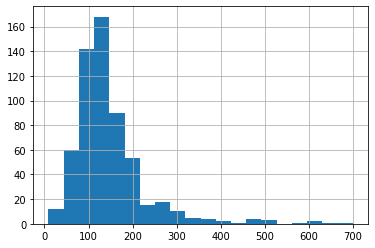

In [51]:
loan['LoanAmount'].hist(bins=20)

* Loan Amount is an important feature we can fill it based on loan status:
    - if **loan status = "Y"** it means *approved*, then i fill the missing values in loan amount by **the mean of loan amounts when the status is "Y"**
    - if **loan status = "N"** *not-approved*, i fill the nulls by the **mean of loans when status = "N"**
    

In [52]:
loan[~loan['LoanAmount'].isnull()].groupby('Loan_Status').describe().T.loc['LoanAmount']

Loan_Status,N,Y
count,181.000000,411.000000
mean,151.220994,144.294404
std,85.862783,85.484607
min,9.000000,17.000000
25%,100.000000,100.000000
50%,129.000000,126.000000
75%,176.000000,161.000000
max,570.000000,700.000000


####the mean of **N** (`Rejected`) $\approx$ 151 
####& the mean of **Y** (`approved`) $\approx$ 144

In [53]:
for row in range(loan.shape[0]):
        if pd.isnull(loan.loc[row, 'LoanAmount']):
            if loan.loc[row, 'Loan_Status'] == 'Y':
                loan.loc[row, 'LoanAmount'] = 151.22
            elif loan.loc[row, 'Loan_Status'] == 'N':
                loan.loc[row, 'LoanAmount'] = 144.29

In [54]:
# change some columns type to integer
loan.Loan_Amount_Term = loan.Loan_Amount_Term.astype("int")  
loan.Credit_History = loan.Credit_History.astype("int")  

In [55]:
# print(loan.loc[loan['ApplicantIncome'] == 12876 ])
loan[loan.ApplicantIncome>50000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,1,Yes,3,Graduate,No,51763,0.0,700.0,300,1,Urban,Y
333,LP002101,1,Yes,0,Graduate,Yes,63337,0.0,490.0,180,1,Urban,Y
409,LP002317,1,Yes,3,Graduate,No,81000,0.0,360.0,360,0,Rural,N


In [56]:
loan.describe()

,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.757329,5403.459283,1621.245798,146.460277,344.618893,0.855049
std,0.386497,1.006376,6109.041673,2926.248369,84.040403,59.027530,0.352339
min,0.000000,0.000000,150.000000,0.000000,9.000000,84.000000,0.000000
25%,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,1.000000,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [57]:
loan[loan.ApplicantIncome==81000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,1,Yes,3,Graduate,No,81000,0.0,360.0,360,0,Rural,N


* i think that 81000 for income is a mistake, and loan_status is not attributed, in my opinion by mistake they add **0**

In [58]:
# i'm going to ajust this outlier without removing it, from 81000 to 8100
loan['ApplicantIncome'] = np.where((loan.ApplicantIncome == 81000), 8100, loan.ApplicantIncome)


In [59]:
loan[loan.ApplicantIncome==8100]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,1,Yes,3,Graduate,No,8100,0.0,360.0,360,0,Rural,N


In [60]:
loan.describe()

,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.757329,5284.729642,1621.245798,146.460277,344.618893,0.855049
std,0.386497,1.006376,5291.067628,2926.248369,84.040403,59.027530,0.352339
min,0.000000,0.000000,150.000000,0.000000,9.000000,84.000000,0.000000
25%,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,1.000000,3.000000,63337.000000,41667.000000,700.000000,480.000000,1.000000


In [61]:
loan["Loan_Status"].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

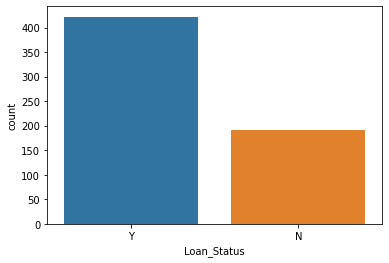

In [62]:
sns.countplot(x = 'Loan_Status', data = loan)

###Around $69$% applicant from 614 was approved. The mojority of loan are accepted.

###Trying bivariate analyses

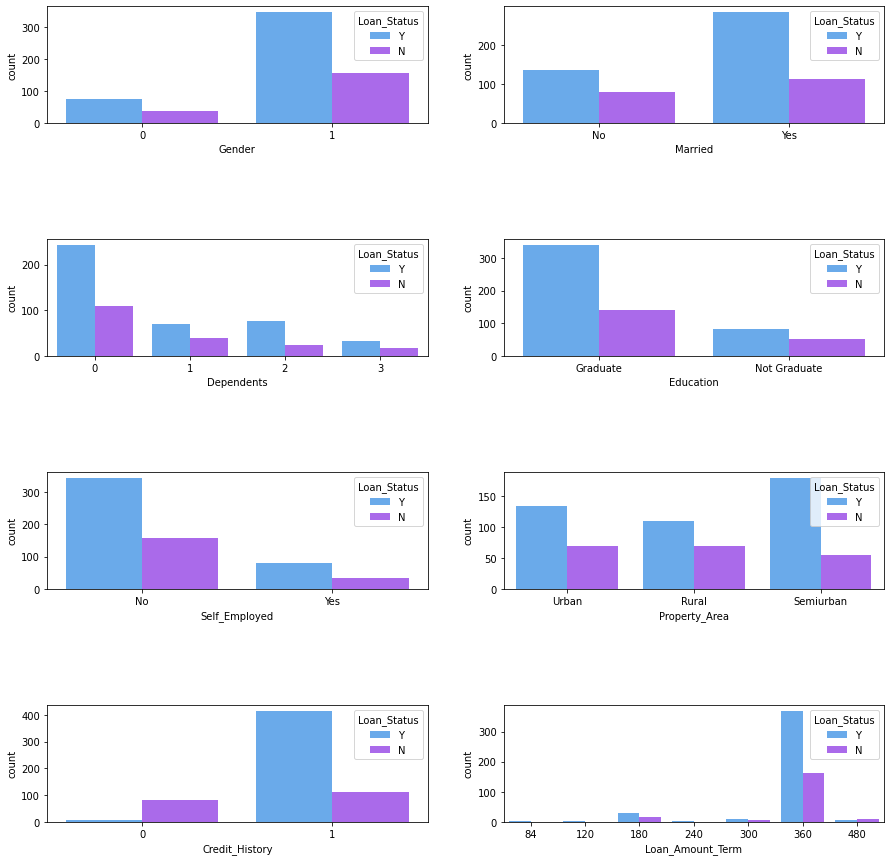

In [63]:
categorical_col= ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig, axes = plt.subplots(4,2,figsize=(15,15))
for i, cat_col in enumerate(categorical_col):
    row,col = i//2,i%2
    sns.countplot(x= cat_col,
                  data= loan,
                  hue= 'Loan_Status',
                  ax= axes[row,col], 
                  palette="cool")


plt.subplots_adjust(hspace=1)

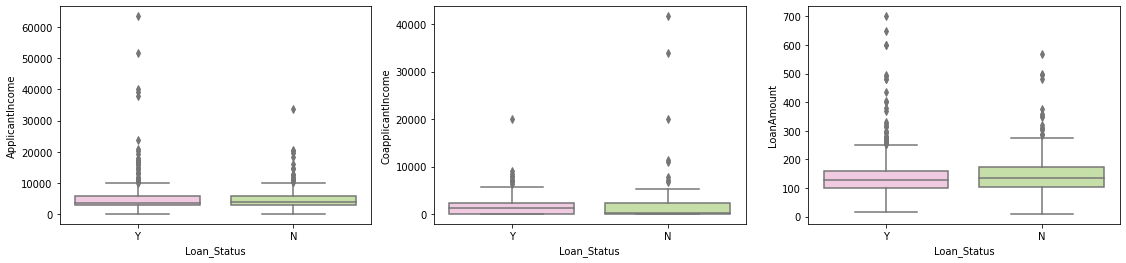

In [64]:
numerical_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig, axes = plt.subplots(1,3, figsize= (19,4) )
for j, num_col in enumerate(numerical_col):
    sns.boxplot(y= num_col,
                data= loan,
                x= 'Loan_Status',
                ax= axes[j],
                palette="PiYG")


plt.subplots_adjust(hspace=1)

##Comments:
##- The mojority of the applicants have been granted loan, well:
###- if the applicant is **male**, **married**, with few or **no dependents** at all, educated **has a degree**, **an employee**, has **a semi-urbain property** and with **no depts**, than he has ***higher propotion of loan approval***
###-For the incomes and the loan amount, there is no significant relation to Loan approval status.

In [65]:
# try to convert the continuous values for the incomes attributes into ordinal bins to well visualize
#list of binned numerical feature vectors 
binned_nums = []

# To get alphabetical label
from string import ascii_uppercase                                  
#0# ApplicantIncome 
AIbins = [0, 1000, 2000, 3000, 4000, 6000, 8000, 15000, 20000, 40000, 63337]
binned_nums.append(pd.cut(loan['ApplicantIncome'], bins=AIbins))

#1# CoapplicantIncome 
CIbins = [0, 500, 1000, 2000, 3000, 4000, 5000, 8000, 12000, 20000, 50000]
binned_nums.append(pd.cut(loan['CoapplicantIncome'], bins=CIbins))

#2# LoanAmount 
LAbins = [0, 50, 100, 200, 500, 1000]
LAlabels = ['very small loan', 'small loan', 'medium loan',
            'large loan', 'big loan']
binned_nums.append(pd.cut(loan['LoanAmount'], bins=LAbins, labels=LAlabels))

#3# Loan_Amount_Term 
LATbins = [0, 84, 360, 480]
LATlabels = ['short_term', 'medium_term', 'long_term']
binned_nums.append(pd.cut(loan['Loan_Amount_Term'], bins=LATbins,
                          labels=LATlabels))


Text(0.5, 0.98, 'Numerical Features (Binned)')

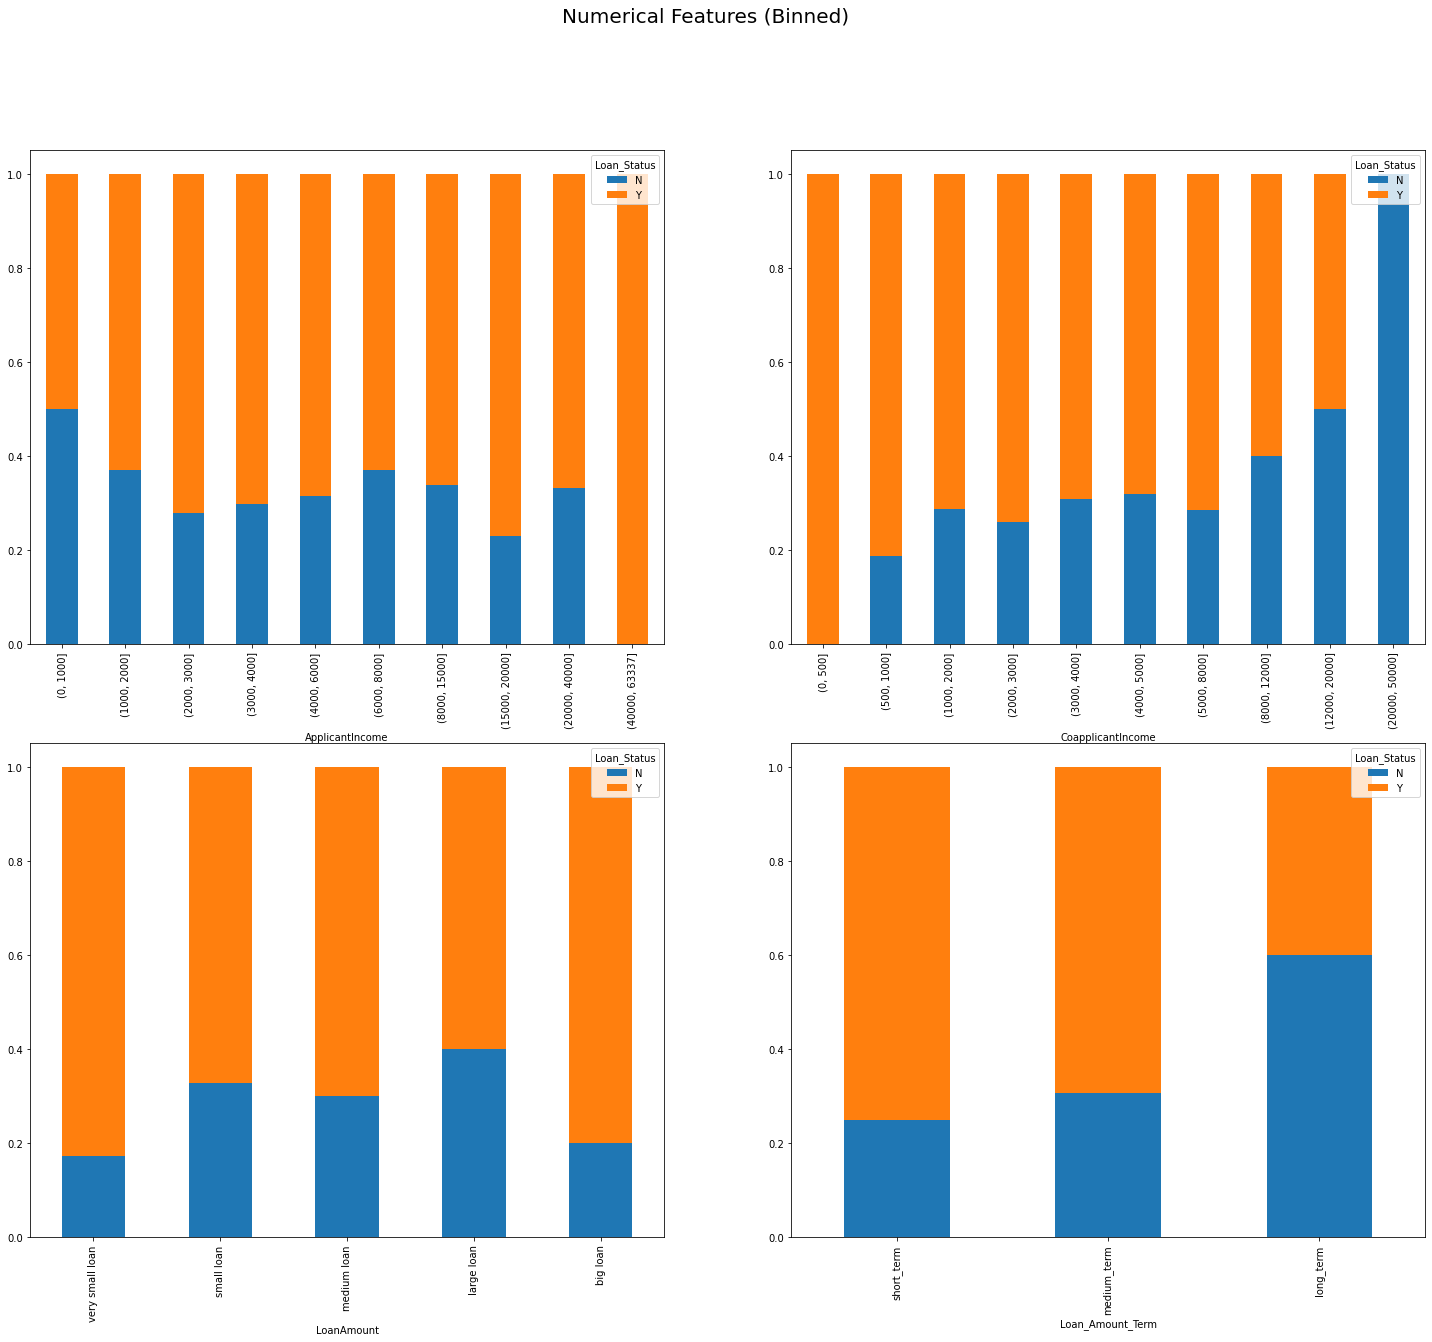

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(25)

i=0

for j,x in enumerate(binned_nums):
    
    if j>1:
        i=1; j-=2
    _crs_tab = pd.crosstab(x.dropna(), loan['Loan_Status'])
    _crs_tab.div(_crs_tab.sum(1).astype(float), axis=0).plot(kind="bar",
                                                             stacked=True,
                                                             ax=axes[i,j])

plt.suptitle("Numerical Features (Binned)", fontsize=20)

* There is no relation between applicant income & loan status, however there is a relation between co-applicant income and the loan status, wich is very loaw  income is approved and it doesn't make sense, 
* the reason behind this is that the majority of applicant, have not co-applicants.
* i'll try to combine the two features **Applicant Income** and **Coapplicant Income**, by create a new feature 'Sum_Incomes', and see:

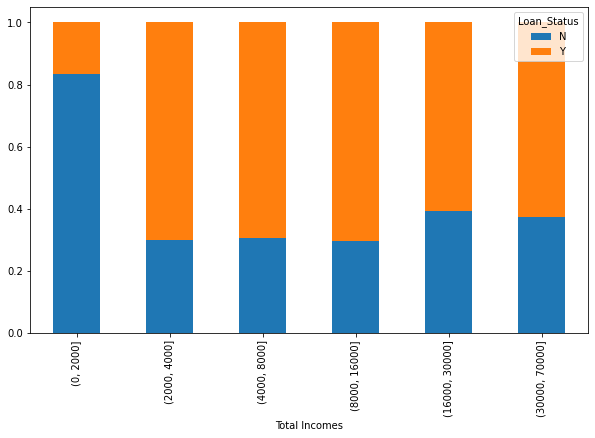

In [67]:
Sum_Incomes = loan['CoapplicantIncome'] + loan['ApplicantIncome']

sumbins = [0, 2000, 4000, 8000, 16000, 30000, 70000]
sum_trans = pd.cut(Sum_Incomes, bins= sumbins)
_crs_tab = pd.crosstab(sum_trans.dropna(), loan['Loan_Status'])
_crs_tab.div(_crs_tab.sum(1).astype(float), axis=0).plot(kind="bar",
                                                         stacked=True, figsize= (10,6), xlabel="Total Incomes")

* here it's clear, applicant with **low incomes**, has less chance to get the loan approval. between 2000 & 16000 income increases the chances of getting the loan, and between incomes > 16000 also most of them, it's quitly not true but maybe because they are few of them.

In [68]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 62.5+ KB


## Replacing the categorical values by numerical

In [69]:

loan['Married'] = loan['Married'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])
loan['Education'] = loan['Education'].apply(lambda x : {'Graduate' : 1, 'Not Graduate' : 0}[x])
loan['Self_Employed'] = loan['Self_Employed'].apply(lambda x : {'Yes' : 1, 'No' : 0}[x])
loan['Property_Area'] = loan['Property_Area'].apply(lambda x : {'Semiurban': 2, 'Urban' : 1, 'Rural' : 0}[x])
loan['Loan_Status'] = loan['Loan_Status'].apply(lambda x : {'N' : 0, 'Y' : 1}[x])


In [70]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 62.5+ KB


## Correlation between features:

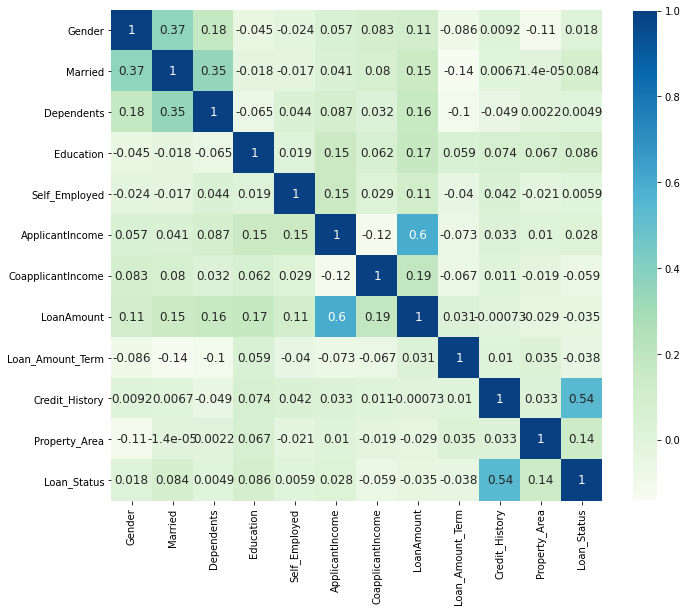

In [71]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 11 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = 'GnBu',square=True, 
                    cbar_kws={ 'shrink' : .9 }, 
                    ax=ax, 
                    annot = True, 
                    annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(loan)

- **loan amount** and **applicant incom** are correlated to each other = 0.6
- **credit history** and **loan status** are also correlated = 0.43

### Drop the useless feature

In [72]:
loan.drop('Loan_ID', axis=1, inplace=True)

In [73]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,151.22,360,1,1,1
1,1,1,1,1,0,4583,1508.0,128.00,360,1,0,0
2,1,1,0,1,1,3000,0.0,66.00,360,1,1,1
3,1,1,0,0,0,2583,2358.0,120.00,360,1,1,1
4,1,0,0,1,0,6000,0.0,141.00,360,1,1,1


####the dataset is ready now for modeling:
* i am going tu use all features, i think that they are all important

## Split the data to *y* (the target) and *x* (all other features) 

In [74]:
# feature extraction
x = loan.iloc[:, 0:-1].values         # (:) = all rows, and (0:-1) = all columns exluding the last one "loan_Status" the target
y = loan.iloc[:, -1].values           # all rows & i pick just the last column loan status our target

In [75]:
# # splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)


# Training models

### 1. Logistic regression Model & evaluation

In [76]:
# (solver='lbfgs', max_iter=1000) = to avoid ConvergenceWarning
# logstic model
model_lr = LogisticRegression(solver='lbfgs', max_iter=2000)
model_lr.fit(x_train, y_train)
pred_lr = model_lr.predict(x_test)

# evaluation
print(f"the Accuracy is = {int(round(accuracy_score(y_test,pred_lr) * 100))} %")
print(f"the F1-Score is = {int(round(f1_score(y_test,pred_lr) * 100))} %")
print(f"the Precision Score is = {int(round(precision_score(y_test,pred_lr) * 100))} %")
print(f"the Recall Score is = {int(round(recall_score(y_test,pred_lr) * 100))} %")

the Accuracy is = 77 %
the F1-Score is = 85 %
the Precision Score is = 75 %
the Recall Score is = 98 %


### 2. Support Vector Machines (SVM) Model & evaluation

In [77]:
model_svm = svm.SVC(kernel='poly')

model_svm.fit(x_train, y_train)
pred_svm = model_svm.predict(x_test)

# evaluate the model
print(f"the Accuracy is = {int(round(accuracy_score(y_test,pred_svm) * 100))} %")
print(f"the F1-Score is = {int(round(f1_score(y_test,pred_svm) * 100))} %")
print(f"the Precision Score is = {int(round(precision_score(y_test,pred_svm) * 100))} %")
print(f"the Recall Score is = {int(round(recall_score(y_test,pred_svm) * 100))} %")

the Accuracy is = 66 %
the F1-Score is = 79 %
the Precision Score is = 65 %
the Recall Score is = 100 %


### 3. k-Nearest neighbors (k-NN) Model & evaluation

In [78]:
# for choosing the best number of neighbors
from math import sqrt
sqrt(len(x_test))

12.409673645990857

In [79]:
#knn model
model_knn = KNeighborsClassifier(n_neighbors = 12)
model_knn.fit(x_train, y_train)
pred_knn = model_knn.predict(x_test)

#Evaluation
print(f"the Accuracy is = {int(round(accuracy_score(y_test,pred_knn) * 100))} %")
print(f"the F1-Score is = {int(round(f1_score(y_test, pred_knn) * 100))} %")
print(f"the Precision Score is = {int(round(precision_score(y_test, pred_knn) * 100))} %")
print(f"the Recall Score is = {int(round(recall_score(y_test, pred_knn) * 100))} %")

the Accuracy is = 61 %
the F1-Score is = 74 %
the Precision Score is = 65 %
the Recall Score is = 87 %


### 4. Decision Tree (DT) Model & evaluation

In [80]:
#DT model
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)
pred_DT = model_DT.predict(x_test)

# evaluation
print(f"the Accuracy is = {int(round(accuracy_score(y_test,pred_DT) * 100))} %")
print(f"the F1-Score is = {int(round(f1_score(y_test, pred_DT) * 100))} %")
print(f"the Precision Score is = {int(round(precision_score(y_test, pred_DT) * 100))} %")
print(f"the Recall Score is = {int(round(recall_score(y_test, pred_DT) * 100))} %")

the Accuracy is = 68 %
the F1-Score is = 76 %
the Precision Score is = 74 %
the Recall Score is = 78 %


### 5. Random Forest (RF) Model & evaluation

In [81]:
# Random forest model
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
pred_rf = model_rf.predict(x_test)

# Evaluation
print(f"the Accuracy is = {int(round(accuracy_score(y_test, pred_rf) * 100))} %")
print(f"the F1-Score is = {int(round(f1_score(y_test, pred_rf) * 100))} %")
print(f"the Precision Score is = {int(round(precision_score(y_test, pred_rf) * 100))} %")
print(f"the Recall Score is = {int(round(recall_score(y_test, pred_rf) * 100))} %")

the Accuracy is = 75 %
the F1-Score is = 83 %
the Precision Score is = 75 %
the Recall Score is = 93 %


## Calculate Evaluation with Cross-Validation

In [82]:
from sklearn.model_selection import cross_val_score

scores1 = cross_val_score(model_lr, x, y, cv=5 ) 
scores2 = cross_val_score(model_knn, x, y, cv=5 ) 
scores3 = cross_val_score(model_svm, x, y, cv=5 ) 
scores4 = cross_val_score(model_DT, x, y, cv=5 ) 
scores5 = cross_val_score(model_rf, x, y, cv=5 ) 
print("%0.2f Logstic accuracy with a standard deviation of %0.2f" % (scores1.mean(), scores1.std()))
print("%0.2f Knn accuracy with a standard deviation of %0.2f" % (scores2.mean(), scores2.std()))
print("%0.2f SVM accuracy with a standard deviation of %0.2f" % (scores3.mean(), scores3.std()))
print("%0.2f DecisionTree accuracy with a standard deviation of %0.2f" % (scores4.mean(), scores4.std()))
print("%0.2f RandomForest accuracy with a standard deviation of %0.2f" % (scores5.mean(), scores5.std()))

0.80 Logstic accuracy with a standard deviation of 0.03
0.66 Knn accuracy with a standard deviation of 0.03
0.69 SVM accuracy with a standard deviation of 0.00
0.71 DecisionTree accuracy with a standard deviation of 0.03
0.79 RandomForest accuracy with a standard deviation of 0.02


In [83]:
confusion_matrix(y_test, pred_lr)

array([[21, 33],
       [ 2, 98]])

In [84]:
confusion_matrix(y_test, pred_svm)

array([[  1,  53],
       [  0, 100]])

In [85]:
confusion_matrix(y_test, pred_knn)

array([[ 7, 47],
       [13, 87]])

In [86]:
confusion_matrix(y_test, pred_DT)

array([[27, 27],
       [22, 78]])

In [87]:
confusion_matrix(y_test, pred_rf)

array([[23, 31],
       [ 7, 93]])

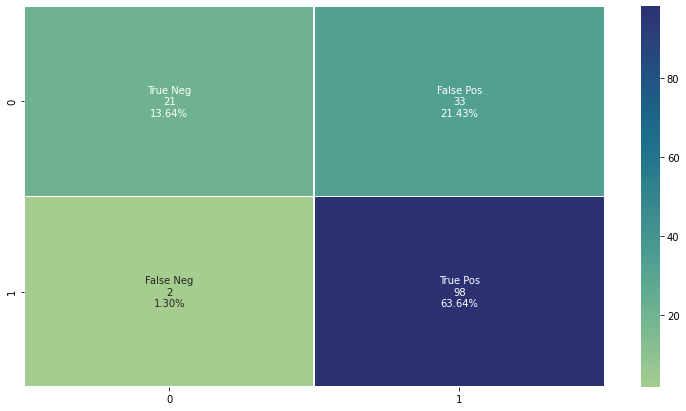

In [88]:
cf_matrix = confusion_matrix(y_test, pred_lr)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize = (13,7))
sns.heatmap(cf_matrix, 
            annot=labels, 
            fmt='', 
            cmap='crest', 
            linewidths=.8)

In [89]:
# 00 = T+: True positive (21) here : the model predicted a positive result and it was positive) == > correct
# 01 = F+: False positive (33) here : the model predicted a positive result and it was negative)
# 10 = F-: False negative (2) here : the model predicted a negative result and it was positive)
# 11 = T-: True negative (98) here : the model predicted a negative result and it was negative) ==> correct

####Comment the *Confusion Matrix*:

* All we want is minimize the `false positive` & `false negative` prediction :
    - the best model here predicted is **`Logistic Regression model`**, and then **random forest**. 
    - well, the *confusion matrix* for logistic regression we've got:
         * False Negative = **2** , it's very good because there is just tow mistakes when the model predicted the approved loan as rejected, then
         * False Positive = **33**, not to bad there is **33** false positive results predicted. the model predicted some rejected loans as approved
         * In the other hand **21 & 98** results predicted `correctly` wich mean we got **119 *correct* results** and **35 *false* results**

####Comment for *Evaluation*:



In [90]:
# the Accuracy is = 77 %
# the F1-Score is = 85 %
# the Precision Score is = 75 %
# the Recall Score is = 98 %

#### The best model for this dataset is logistic regression classifier:
1. The **Accuracy** score $=$ $77$% : our model is 77% accurate, wich is good but just correctly predicted observation from total observations. (good but let's see *f1-score*)

2. **F1-Score** $=$ $85$% : the model predicted 85%, witch is pretty good, because unlike accuracy, the f1-score takes both FP & FN into account.
    - F1-SCORE is usually more useful than accuracy. 

3. then for **precision score** : We have got 75% precision which is pretty good, from all applicant that labeled as approuved, how many actually approuved? and here we gave High precision wich relates to the **low false positive**

* at last **Recall score**: We have got recall of 98% which is very good, the ratio of correctly predicted positive observations from all observations in actual class - yes (approuved), elligible clients 98% accurate perfect just 2% wrongly predicted


In [91]:
print(pred_lr)


[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1]


In [92]:
## TAken data from the dataset
# Male=                     1	
# married =                 Yes(1)
# dependents =              0	
# education =               not graduate (0)
# Self-employed =           1(yes)	
# income =                  2609	
# co-icome =                3449	
# amount =                  165	(165000 $)
# term =                    180	month
# credit history            0(no)
# area                      Rural(1)

#rejected (0)	N

t = model_lr.predict([[1,	0,	0,	0,	1,	2609.0,	3449.0,	165,	180,	0,	2]])

In [95]:
print(t)

[0]
